# **Pendahuluan**

“Aksara, coba ikut saya ke ruangan rapat sebentar. Ada yang mau saya tunjukkan,” pinta Andra.

Baru kali ini Andra mengajakku ke ruang rapat. Biasanya aku hanya mendengar ia mau rapat, dan sering kali ia sendiri juga yang menghampiriku. Aku pun segera beranjak. Ini pasti berkaitan dengan proyek yang dijanjikannya. Sesampaiku di ruang rapat, laptop Andra sudah terbuka dan menampilkan pantulan layar berupa data angka-angka. 


“Begini, Aksara. Perusahaan kita lagi butuh perbandingan performa dari setiap cabang di berbagai kota. Nanti ambil saja lima kota terbesar di Pulau Jawa untuk dianalisis dari segi order size, customer count, product count, brand count, dan GMV dalam basis bulanan. Sampai sini apakah cukup paham?”


Sebenarnya aku cukup paham, tapi untuk memastikannya aku pun bertanya, “Jadi, ini aku perlu pivot ya untuk setiap measure yang dibutuhkan, lalu mencari angkanya per bulan?”


“Benar. Sebelum saya beri deadline, dari kamu bisa selesai kapan?” tawar Andra. 


“Hmmm, datanya sendiri sudah bersih atau perlu aku cleaning lagi, Ndra?” tanyaku sembari menimbang-nimbang. 


“Datanya sudah bersih. Nanti akan coba saya kirimkan yang versi lengkapnya dalam tahun 2019 agar bisa kamu pertimbangkan estimasi waktu pengerjaan.”


“Oke, Ndra. Soalnya, kalau datanya sudah bersih, dua hari cukup sih. Tapi aku cek dulu deh data lengkap yang nanti dikirim.”


“Selamat bekerja, Aksara.”

### **Performa Penjualan di Setiap Cabang**

Diberikan 4 csv files yang isinya retail data untuk tiap Quarter:

- csv (data dari bulan January - March)       --> https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/LO4/retail_data_from_1_until_3.csv
- csv (data dari bulan April - June)              --> https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/LO4/retail_data_from_4_until_6.csv
- csv (data dari bulan July - September)      --> https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/LO4/retail_data_from_7_until_9.csv
- csv (data dari bulan October - December)  --> https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/LO4/retail_data_from_10_until_12.csv
 

**Goal**: Automation untuk pembuatan grafik dari measurement yang dibutuhkan.

 
Untuk part 1 ini yang perlu dilakukan:

[1]. Load masing-masing data *.csv dengan Pandas

[2]. Pengecekan dan Transformasi Data 

- Cek data sekilas (melihat bentuk data biasanya 5 data teratas)
- Cek list kolom untuk semua dataframe apakah seluruh kolom dari keempat dataframe yang terpisah itu sama
- Jika sama digabungkan.
- Cek informasi dataframe yang telah digabungkan
- Statistik deskriptif dari dataframe yang telah digabungkan.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# [1]. Load masing-masing data dengan pandas
retail_data1 = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/LO4/retail_data_from_1_until_3.csv')
retail_data2 = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/LO4/retail_data_from_4_until_6.csv')
retail_data3 = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/LO4/retail_data_from_7_until_9.csv')
retail_data4 = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/LO4/retail_data_from_10_until_12.csv')

# [2]. Pengecekan Data
print('n\PENGECEKAN DATA\n\n')

#      Cek data sekilas (tampilkan 5 baris teratas)
retail_data1.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


n\PENGECEKAN DATA




,Unnamed: 0,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,total_price
0,0,1612339,2019-01-01,18055,Jakarta Selatan,DKI Jakarta,P0648,BRAND_C,4,1934000,7736000
1,1,1612339,2019-01-01,18055,Jakarta Selatan,DKI Jakarta,P3826,BRAND_V,8,604000,4832000
2,2,1612339,2019-01-01,18055,Jakarta Selatan,DKI Jakarta,P1508,BRAND_G,12,747000,8964000
3,3,1612339,2019-01-01,18055,Jakarta Selatan,DKI Jakarta,P0520,BRAND_B,12,450000,5400000
4,4,1612339,2019-01-01,18055,Jakarta Selatan,DKI Jakarta,P1513,BRAND_G,3,1500000,4500000


In [2]:
#      Cek list kolom untuk semua dataframe
print('Kolom retail_data1: %s' %retail_data1.columns)
print('Kolom retail_data2: %s' %retail_data2.columns)
print('Kolom retail_data3: %s' %retail_data3.columns)
print('Kolom retail_data4: %s' %retail_data4.columns)

Kolom retail_data1: Index(['Unnamed: 0', 'order_id', 'order_date', 'customer_id', 'city',
       'province', 'product_id', 'brand', 'quantity', 'item_price',
       'total_price'],
      dtype='object')
Kolom retail_data2: Index(['Unnamed: 0', 'order_id', 'order_date', 'customer_id', 'city',
       'province', 'product_id', 'brand', 'quantity', 'item_price',
       'total_price'],
      dtype='object')
Kolom retail_data3: Index(['Unnamed: 0', 'order_id', 'order_date', 'customer_id', 'city',
       'province', 'product_id', 'brand', 'quantity', 'item_price',
       'total_price'],
      dtype='object')
Kolom retail_data4: Index(['Unnamed: 0', 'order_id', 'order_date', 'customer_id', 'city',
       'province', 'product_id', 'brand', 'quantity', 'item_price',
       'total_price'],
      dtype='object')


Selanjutanya kita akan mengecek jumlah baris dari masing-masing file csv.

In [3]:
print('\nJumlah baris retail_data1:', retail_data1.shape[0])
print('\nJumlah baris retail_data2:', retail_data2.shape[0])
print('\nJumlah baris retail_data3:', retail_data3.shape[0])
print('\nJumlah baris retail_data4:', retail_data4.shape[0])


Jumlah baris retail_data1: 94888

Jumlah baris retail_data2: 101233

Jumlah baris retail_data3: 110610

Jumlah baris retail_data4: 201826


In [4]:
#      Concat multiple dataframe menjadi 1 dataframe
retail_table = pd.concat([retail_data1,retail_data2,retail_data3,retail_data4])
print('\nJumlah baris retail_table:', retail_table.shape[0])


Jumlah baris retail_table: 508557


In [5]:
#      Pengecekan dataframe info
print('\nInfo:')
print(retail_table.info())


Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 508557 entries, 0 to 201825
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   508557 non-null  int64 
 1   order_id     508557 non-null  object
 2   order_date   508557 non-null  object
 3   customer_id  508557 non-null  int64 
 4   city         508557 non-null  object
 5   province     508557 non-null  object
 6   product_id   508557 non-null  object
 7   brand        508557 non-null  object
 8   quantity     508557 non-null  int64 
 9   item_price   508557 non-null  int64 
 10  total_price  508557 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 46.6+ MB
None


In [6]:
#      Pengecekan statistik deskriptif
print('\nStatistik deskriptif:\n', retail_table.describe())


Statistik deskriptif:
           Unnamed: 0    customer_id       quantity    item_price   total_price
count  508557.000000  508557.000000  508557.000000  5.085570e+05  5.085570e+05
mean    71004.479982   11509.957582      10.571326  1.357347e+06  7.043305e+06
std     49737.328863    6758.489806     112.805119  1.481544e+07  5.135112e+07
min         0.000000       0.000000       1.000000 -3.871709e+09 -3.871709e+09
25%     31784.000000   12370.000000       1.000000  4.500000e+05  1.356000e+06
50%     63569.000000   14388.000000       4.000000  7.400000e+05  3.498000e+06
75%     95509.000000   16261.000000      11.000000  1.458000e+06  6.270000e+06
max    201825.000000   18287.000000   74215.000000  4.739478e+09  2.790484e+10


In [7]:
#      Pengecekan statistik deskriptif untuk variable bertipe data string
print('\nStatistik deskriptif:\n', retail_table.describe(include= 'object'))


Statistik deskriptif:
         order_id  order_date     city     province product_id    brand
count     508557      508557   508557       508557     508557   508557
unique     19900         297       39           23       4040       26
top      1720756  2019-12-30  unknown  DKI Jakarta      P4009  BRAND_S
freq        1114        5302   125639       180544       2236    74078


## **Performa Penjualan di setiap Cabang - Part 2**

Melanjutkan penyelesaian persoalan ke langkah berikutnya

[3] Transformasi Data 

Jika ada data yang tidak seharusnya maka dapat dibuang
Jika ada kolom yang seharusnya bertipe datetime64 ubahlah
Cek kembali informasi dataframe 
Tampilkan kembali statistik deskriptif dari dataframe

In [8]:
 # [3]. Transformasi Data
print('TRANSFORMASI DATA\n\n')
#      Memastikan data yang memiliki item_price < 0 atau total_price < 0
cek = retail_table.loc[(retail_table['item_price']< 0) | (retail_table['total_price'] < 0)]
print('\nitem_price < 0 atau total_price < 0:\n', cek)

TRANSFORMASI DATA



item_price < 0 atau total_price < 0:
        Unnamed: 0   order_id  order_date  ...  quantity  item_price total_price
83664       83664  undefined  2019-09-06  ...         1 -3871709000 -3871709000
83665       83665  undefined  2019-09-06  ...         1 -3871709000 -3871709000

[2 rows x 11 columns]


In [9]:
#      Jika tidak masuk akal datanya dapat dibuang
if cek.shape[0] != 0:
	retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price'] > 0)]

Kita pastikan terlebih dahulu apakah datanya benar-benar sudah terhapus atau belum.

In [10]:
retail_table.loc[(retail_table['item_price']< 0) | (retail_table['total_price'] < 0)]

,Unnamed: 0,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,total_price


Terlihat diatas bahwa data yang memiliki item_price < 0 atau total_price < 0 telah berhasil kita hapus.

Berikutnya, kita akan mengecek apakah masih ada **order_id** yang bernilai `undefined`, jika iya maka kita akan delete row tersebut.

In [11]:
#      Cek apakah masih ada order_id yang bernilai undefined dan delete row tersebut
cek = retail_table.loc[retail_table['order_id'] == 'undefined']
print('\norder_id yang bernilai undefined:\n', cek)


#      Jika ada maka buang baris tersebut
if cek.shape[0] != 0:
	retail_table = retail_table.loc[retail_table['order_id'] != 'undefined']



order_id yang bernilai undefined:
        Unnamed: 0   order_id  order_date  ...  quantity  item_price total_price
83663       83663  undefined  2019-09-06  ...         1  3871733000  3871733000

[1 rows x 11 columns]


cek sekali lagi apakah row **order_id** yang bernilai `undefined`.

In [12]:
retail_table.loc[retail_table['order_id'] == 'undefined']

,Unnamed: 0,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,total_price


Seperti terlihat diatas, kita telah berhasil menghapus **order_id** yang bernilai `undefined`

Selanjutnya, kita akan melakukan transformasi tipe data dari kolom **order_id** dan **order_date**.

In [13]:
#      Transform order_id menjadi int64
retail_table['order_id'] = retail_table['order_id'].astype('int64')

#      Transform order_date menjadi datetime Pandas
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])

#      Cek dataframe info kembali untuk memastikan
print('\nInfo:')
print(retail_table.info())


Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 508554 entries, 0 to 201825
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Unnamed: 0   508554 non-null  int64         
 1   order_id     508554 non-null  int64         
 2   order_date   508554 non-null  datetime64[ns]
 3   customer_id  508554 non-null  int64         
 4   city         508554 non-null  object        
 5   province     508554 non-null  object        
 6   product_id   508554 non-null  object        
 7   brand        508554 non-null  object        
 8   quantity     508554 non-null  int64         
 9   item_price   508554 non-null  int64         
 10  total_price  508554 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 46.6+ MB
None


In [14]:
#      Cek statistik deskriptif kembali, untuk memastikan
print('\nStatistik deskriptif:\n')
retail_table.describe()


Statistik deskriptif:



,Unnamed: 0,order_id,customer_id,quantity,item_price,total_price
count,508554.000000,5.085540e+05,508554.000000,508554.000000,5.085540e+05,5.085540e+05
mean,71004.405302,1.680676e+06,11510.025480,10.571383,1.364968e+06,7.050960e+06
std,49737.466061,3.865433e+04,6758.451924,112.805449,1.144767e+07,5.048185e+07
min,0.000000,1.612339e+06,0.000000,1.000000,1.200000e+04,1.200000e+04
25%,31784.000000,1.646143e+06,12370.000000,1.000000,4.500000e+05,1.356000e+06
50%,63569.000000,1.682617e+06,14388.000000,4.000000,7.400000e+05,3.498000e+06
75%,95509.750000,1.714960e+06,16261.000000,11.000000,1.458000e+06,6.270000e+06
max,201825.000000,1.742998e+06,18287.000000,74215.000000,4.739478e+09,2.790484e+10


## **Performa Penjualan di setiap Cabang - Part 3**

Mari lanjutkan ke langkah berikutnya

[4]. Filter province yang hanya termasuk 5 provinsi besar di Jawa (DKI Jakarta, Jawa Barat, Jawa Tengah, Jawa Timur, dan Yogyakarta)

[5]. Mengelompokkan data berdasarkan **order_date** dan **province** yang sudah difilter dan menghitung order unique count, customer unique count, product unique count, brand unique count, dan GMV (Gross Merchandise Volume = total_price untuk semua penjualan)

[6]. Melakukan unstack untuk mendapatkan **order_date** di bagian baris dan **province** di bagian column

 

In [15]:
# [4]. Filter hanya 5 province terbesar di pulau Jawa
print('\nFILTER 5 PROVINCE TERBESAR DI PULAU JAWA\n')
java = ['DKI Jakarta','Jawa Barat','Jawa Tengah','Jawa Timur','Yogyakarta']
retail_table = retail_table.loc[retail_table['province'].isin(java)]
#      Untuk memastikan kolom provinsi isinya sudah sama dengan java
print(retail_table['province'].unique())


FILTER 5 PROVINCE TERBESAR DI PULAU JAWA

['DKI Jakarta' 'Jawa Barat' 'Jawa Timur' 'Yogyakarta' 'Jawa Tengah']


In [16]:
retail_table.head()

,Unnamed: 0,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,total_price
0,0,1612339,2019-01-01,18055,Jakarta Selatan,DKI Jakarta,P0648,BRAND_C,4,1934000,7736000
1,1,1612339,2019-01-01,18055,Jakarta Selatan,DKI Jakarta,P3826,BRAND_V,8,604000,4832000
2,2,1612339,2019-01-01,18055,Jakarta Selatan,DKI Jakarta,P1508,BRAND_G,12,747000,8964000
3,3,1612339,2019-01-01,18055,Jakarta Selatan,DKI Jakarta,P0520,BRAND_B,12,450000,5400000
4,4,1612339,2019-01-01,18055,Jakarta Selatan,DKI Jakarta,P1513,BRAND_G,3,1500000,4500000


In [17]:
# [5]. Kelompokkan sesuai dengan order_date dan province kemudian aggregasikan
groupby_city_province = retail_table.groupby(['order_date','province']).agg({
   'order_id': 'nunique',
   'customer_id': 'nunique',
   'product_id': 'nunique',
   'brand': 'nunique',
   'total_price': 'sum'
})

In [18]:
#      Cek nama kolom groupby_city_province
groupby_city_province.columns

Index(['order_id', 'customer_id', 'product_id', 'brand', 'total_price'], dtype='object')

In [19]:
#      Ubah nama kolomnya menjadi 'order','customer','product','brand','GMV'
groupby_city_province.columns = ['order','customer','product','brand','GMV']
print('\ngroupby_city_province (10 data teratas):reata\n', groupby_city_province.head(10))


groupby_city_province (10 data teratas):reata
                         order  customer  product  brand         GMV
order_date province                                                
2019-01-01 DKI Jakarta     34        33      328     22  4717083000
           Jawa Barat      11         9      136     18  1557289000
           Jawa Tengah      4         4      116     20   352052000
           Jawa Timur       6         6       83     15  1106603000
           Yogyakarta       7         4       88     16  9454007000
2019-01-02 DKI Jakarta     58        50      590     25  6218886000
           Jawa Barat      17        14      246     21  1458207000
           Jawa Tengah      8         7       67     18   968273000
           Jawa Timur       6         6       69     17   901676000
           Yogyakarta      12        12      238     23  1509057000


In [20]:
# [6]. Unstack untuk mendapatkan order_date di bagian baris dan province di bagian column
unstack_city_province = groupby_city_province.unstack(level='province').fillna(0)
print('\nunstack_city_province (5 data teratas):\n')
unstack_city_province.head()


unstack_city_province (5 data teratas):



order             ...           GMV              
province   DKI Jakarta Jawa Barat  ...    Jawa Timur    Yogyakarta
order_date                         ...                            
2019-01-01        34.0       11.0  ...  1.106603e+09  9.454007e+09
2019-01-02        58.0       17.0  ...  9.016760e+08  1.509057e+09
2019-01-03        43.0       13.0  ...  1.189519e+09  1.582902e+09
2019-01-04        39.0        9.0  ...  2.418780e+08  5.945680e+08
2019-01-06        22.0        9.0  ...  2.157180e+08  1.221680e+08

[5 rows x 25 columns]

## **Performa Penjualan di setiap Cabang - Part 4**

Ayo lanjutkan ke langkah berikutnya:

[7]. Slicing data untuk masing-masing measurement (kolom), misal: kolom order

[8]. Lakukan resampling pada data tersebut untuk dilakukan perhitungan secara bulanan

In [21]:
# [7]. Slicing data untuk masing-masing measurement, misal: order
idx = pd.IndexSlice
by_order = unstack_city_province.loc[:,idx['order']]
print('\nby order (5 data teratas):\n', by_order.head())

# [8]. Lakukan resampling pada data tersebut untuk dilakukan perhitungan rata-rata bulanan 
by_order_monthly_mean = by_order.resample('M').mean()
print('\nby_order_monthly_mean (5 data teratas):\n', by_order_monthly_mean.head())


by order (5 data teratas):
 province    DKI Jakarta  Jawa Barat  Jawa Tengah  Jawa Timur  Yogyakarta
order_date                                                              
2019-01-01         34.0        11.0          4.0         6.0         7.0
2019-01-02         58.0        17.0          8.0         6.0        12.0
2019-01-03         43.0        13.0          8.0         8.0        10.0
2019-01-04         39.0         9.0         11.0         2.0         3.0
2019-01-06         22.0         9.0          3.0         4.0         2.0

by_order_monthly_mean (5 data teratas):
 province    DKI Jakarta  Jawa Barat  Jawa Tengah  Jawa Timur  Yogyakarta
order_date                                                              
2019-01-31    27.222222   10.500000     5.111111    3.500000    4.555556
2019-02-28    19.083333    7.458333     3.250000    3.208333    2.833333
2019-03-31    18.576923    6.615385     3.615385    3.192308    3.038462
2019-04-30    22.923077    8.000000     4.038462    3

## **Performa Penjualan di setiap Cabang - Part 5**

Sekarang dilanjutkan untuk langkah #[9] yaitu menampilkan grafik dari langkah #[8] yang telah dilakukan.

[9]. Plot untuk hasil pada langkah #[8]

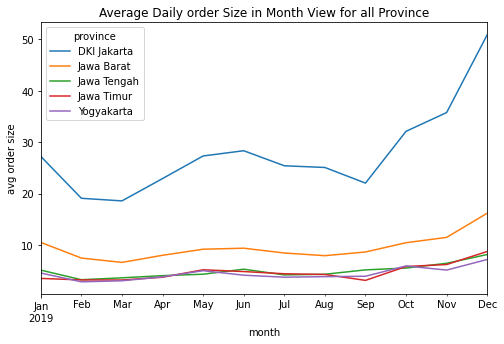

In [22]:
import matplotlib.pyplot as plt

# [9]. Plot untuk hasil pada langkah #[8]
by_order_monthly_mean.plot(
   figsize = (8,5),
   title = 'Average Daily order Size in Month View for all Province'
)
plt.ylabel('avg order size')
plt.xlabel('month')
plt.show()

Dapat dilihat bahwa avg order size untuk DKI Jakarta tertinggi dan terus memiliki kenaikan, disusul oleh Jawa Barat dan kemudian 3 sisanya hampir berada dalam angka yang rata-rata sama

## **Performa Penjualan di setiap Cabang - Part 6**

Langah 7 s/d 9 yang telah dilakukan baru untuk satu measurement yaitu order. Berarti ada empat kali lagi kode seperti ini harus dibuat. Karena struktur code masih sama, dapat menggunakan perulangan sesuai dengan jumlah measurement yaitu 5, sehingga kelima measurement dapat ditampilkan grafiknya dalam satu canvas figure.

Mari memulai dengan membuat sebuah perulangan dengan dataframe **unstack_city_province** yang digunakan (hasil dari langkah ke 5 di part 2).

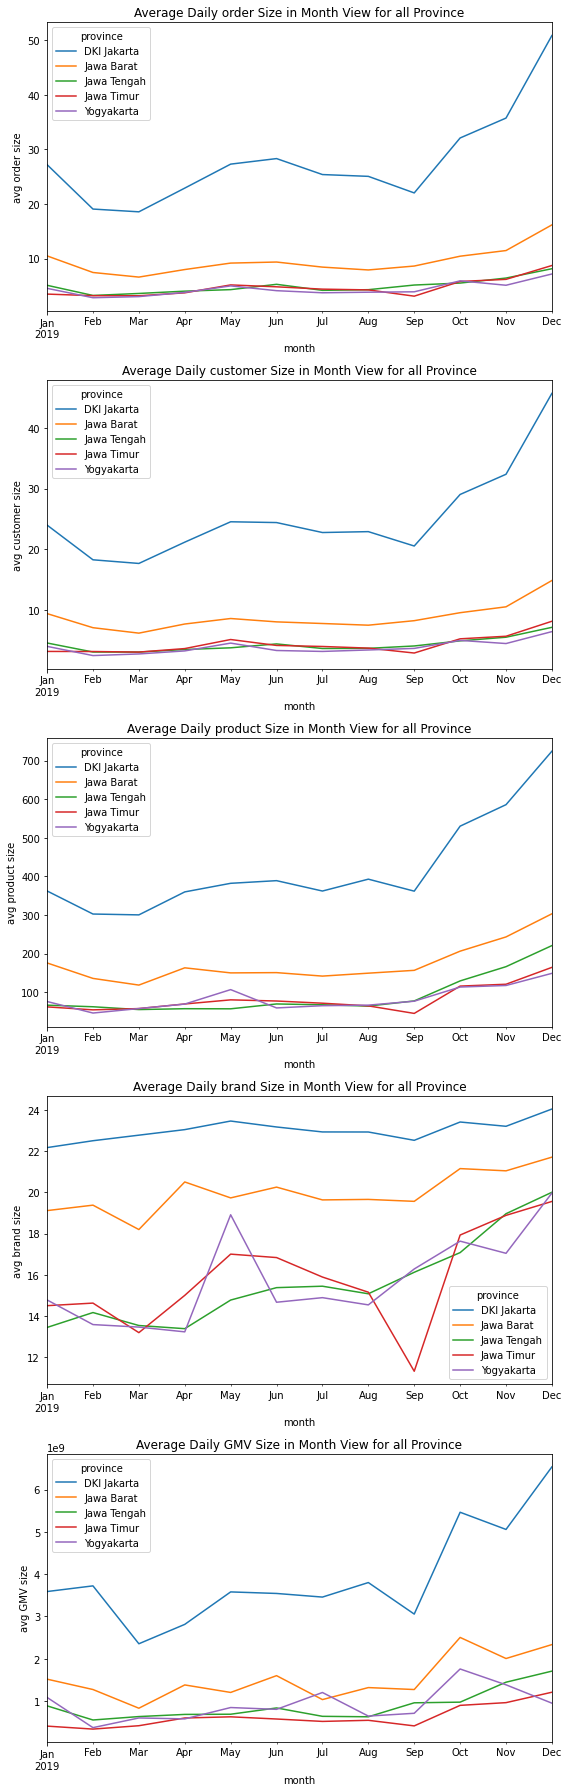

In [28]:
import matplotlib.pyplot as plt

# Create figure canvas dan axes for 5 line plots
fig, axes = plt.subplots(5, 1, figsize=(8, 25))

# Slicing index
idx = pd.IndexSlice
for i, measurement in enumerate(groupby_city_province.columns):
    # Slicing data untuk masing-masing measurement
    by_measurement = unstack_city_province.loc[:,idx[measurement]]
    # Lakukan resampling pada data tersebut untuk dilakukan perhitungan rata-rata bulanan 
    by_measurement_monthly_mean = by_measurement.resample('M').mean()
    # Plot by_measurement_monthly_mean
    by_measurement_monthly_mean.plot(
        title = 'Average Daily ' + measurement + ' Size in Month View for all Province',
        ax = axes[i]
    )
    axes[i].set_ylabel('avg ' + measurement + ' size')
    axes[i].set_xlabel('month')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

## **Evaluasi Andra untuk Project yang Telah Disubmit**

Aku baru selesai mengecek ulang hasil kerjaku sebelum kuberikan pada Andra. Sejauh pemeriksaanku semua tampak baik-baik saja. Aku pun menutup laptopku dan membawanya ke ruangan Andra. Harus kuakui, aku cukup berdebar-debar! Walaupun proyek pertama berjalan lancar, tetap saja rasanya tegang membayangkan tanggapan Andra terhadap hasil kerjaku. Semoga tidak mengecewakan. 


“Ndra, maaf ganggu. Ini hasil proyek kemarin sudah selesai. Aku menganalisis rata-rata jumlah order, customer, produk, brand, dan GMV per hari dalam bulanan untuk 5 provinsi besar di Pulau Jawa sesuai rikues. Mau dicek dulu?”


“Boleh, coba tolong dibawa ke mari laptop kamu.” 


Selang beberapa menit, Andra menyahut “Saya mau tanya. Kamu pakai define function di kodemu, gunanya untuk apa?”


“Buat automate pembuatan dan penyimapanan grafik, Ndra. Jadi tinggal state saja dataframe-nya yang mana dan pengelompokkannya seperti apa.” jelasku. Ujian tanya jawab telah dimulai! Andra memang tipikal mentor yang akan menguji hasil pekerjaan. Perlahan cara ini melatihku untuk mengambil keputusan dan langkah yang benar-benar matang.


“Oke. Kenapa kamu enggak pakai command saja yang diulang sampai 5 kali kepada 5 measurement yang berbeda?” 


“Soalnya pakai looping akan lebih mudah, Ndra. Aku tinggal mengganti order pada Part 3 menjadi sebuah variable bernama measurement, lalu lakukan for loop untuk diulang ke semua measurement yang ada,” jawabku mantap.


Andra tersenyum. “Oke, sepertinya kamu benar-benar tahu apa yang kamu lakukan. Akan saya bawa ke rapat nanti untuk dibahas dengan kepala cabang, saya akan undang kamu ke rapat juga.”


Aku mengangguk antusias. 


## **Hasil Belajarku :)**

Walau harus bekerja keras, aku cukup puas dengan hasil kerjaku hari ini. Aku memandangi kode final yang sudah selesai kukerjakan. Diam-diam ada perasaan bangga menyelip di benakku! YES!

Akhirnya, aku telah menyelesaikan modul Data Manipulation with Pandas - Part 2. Materi-materi yang telah kupelajari dan praktekkan dalam modul ini aku telah mendapatkan pengetahuan (knowledge) dan praktek (skill) untuk:

Dapat menerapkan teknik penggabungan data antar Series dan Dataframe dengan menggunakan concat, merge dan join.
Dapat memahami konsep dan menerapkan teknik pivot, melt, stackdan unstack pada dataframe untuk memformat ulang bentuk data.
Dapat memahami konsep dan menerapkan teknik groupbydan aggregation untuk mengurangi jumlah data.
Mengenal dan memahami konsep time series di Pandas
Latihan dalam mengerjakan project bisnis sederhana menggunakan pandas
 

Ada juga sejumlah catatan yang perlu aku ingat, yaitu

Jikalau terdapat berbagai multiple source untuk extract 1 informasi, maka pastikan struktur datanya adalah sama, list column dan data types.
Mengerti business understanding nya sehingga jika diperlukan melakukan join maka bisa melakukan join dengan efektif dan tepat
Mengerti tujuan analisisnya sehingga bisa melakukan aggregation dan transform data (pivot, melt, etc) data dengan tepat dan efektif
Sebisa mungkin selalu set index pada kolom datetime sehingga slicing menjadi lebih mudah dan melakukan hal lain seperti downsampling ataupun upsampling
Selalu gunakan automation jika memungkinkan karena itu akan mempermudah hidupmu dan menghemat waktu
 

Pesan dari data mentor Karl Christian

“Data Manipulation is redundant tasks if you have to specify all the parameters one by one, the key is trying to figure out the first phase, then replicate that command become a function that you can call to create a scalable output. This process can be called as Automation.”  By KARL CHRISTIAN, 2020

 

 


Semangat!